In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##Loading Data


In [16]:
from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

## Some Preprocessing

In [17]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

x_val = x_test[:200]
x_test = x_test[200:]
y_val = y_test[:200]
y_test = y_test[200:]

## Creating and Training Model

In [19]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Input
from tensorflow.keras.callbacks import EarlyStopping

callback = tensorflow.keras.callbacks.EarlyStopping(monitor='accuracy', patience=3)

input_layer = Input((28, 28, 1))

x = layers.Conv2D(filters=16, kernel_size=2, activation='relu')(input_layer)
x = layers.MaxPooling2D((2, 2))(x)

x = layers.Conv2D(filters=16, kernel_size=2, activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)

x = layers.Conv2D(filters=32, kernel_size=2, activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)

x = layers.Conv2D(filters=64, kernel_size=2, activation='relu')(x)

x = layers.Flatten()(x)

output_layer = layers.Dense(10, activation='sigmoid')(x)

model = Model(input_layer, output_layer)


model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 27, 27, 16)        80        
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 12, 12, 16)        1040      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 6, 6, 16)         0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 5, 5, 32)          2080

In [11]:
history = model.fit(x_train, y_train, epochs=100, batch_size=256, validation_split=0.2, callbacks=[callback])

Epoch 1/100
188/188 [==============================] - 20s 101ms/step - loss: 1.0862 - accuracy: 0.6300 - val_loss: 0.6737 - val_accuracy: 0.7479
Epoch 2/100
188/188 [==============================] - 19s 98ms/step - loss: 0.6256 - accuracy: 0.7650 - val_loss: 0.5832 - val_accuracy: 0.7847
Epoch 3/100
188/188 [==============================] - 19s 99ms/step - loss: 0.5606 - accuracy: 0.7930 - val_loss: 0.5633 - val_accuracy: 0.7931
Epoch 4/100
188/188 [==============================] - 19s 99ms/step - loss: 0.5197 - accuracy: 0.8088 - val_loss: 0.5313 - val_accuracy: 0.8105
Epoch 5/100
188/188 [==============================] - 19s 99ms/step - loss: 0.4911 - accuracy: 0.8214 - val_loss: 0.4943 - val_accuracy: 0.8220
Epoch 6/100
188/188 [==============================] - 19s 99ms/step - loss: 0.4654 - accuracy: 0.8312 - val_loss: 0.4748 - val_accuracy: 0.8288
Epoch 7/100
188/188 [==============================] - 19s 99ms/step - loss: 0.4459 - accuracy: 0.8386 - val_loss: 0.4472 - val_a

## Model Evaluation

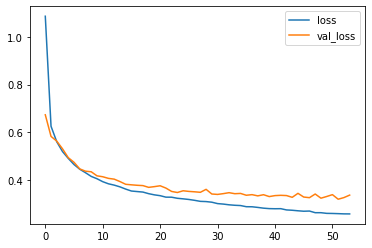

In [12]:
history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()

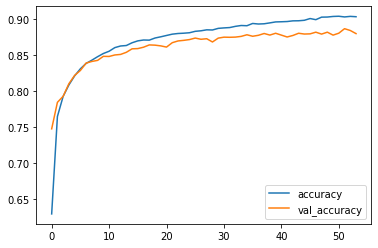

In [13]:
history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['accuracy', 'val_accuracy']].plot()

In [ ]:
model.save('model.h5')